In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/customers.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [3]:
df.columns
df.dtypes
df.shape
df.isnull().sum()


ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [4]:
df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

df_cleaned = df.dropna(axis=0)

df_cleaned.isnull().sum()
df_cleaned.shape
df_cleaned.dtypes


Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

df_cleaned['Gender'].unique()
df_cleaned['Ever_Married'].unique()
df_cleaned['Graduated'].unique()
df_cleaned['Profession'].unique()
df_cleaned['Spending_Score'].unique()
df_cleaned['Segmentation'].unique()


array(['D', 'B', 'C', 'A'], dtype=object)

In [6]:
categories_list=[['Male', 'Female'],['No', 'Yes'],
                 ['No', 'Yes'],['Healthcare', 'Engineer',
                 'Lawyer','Artist', 'Doctor','Homemaker',
                 'Entertainment', 'Marketing', 'Executive'],
                 ['Low', 'Average', 'High']]





In [37]:
enc = OrdinalEncoder(categories=categories_list)

In [38]:
df1 = df_cleaned.copy()

In [39]:
df1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']] = enc.fit_transform(df1[['Gender',
     						'Ever_Married','Graduated',
                            'Profession','Spending_Score']])

In [40]:
df1
df1.dtypes



Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

In [34]:
le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

df1.dtypes

corr = df1.corr()

<Axes: >

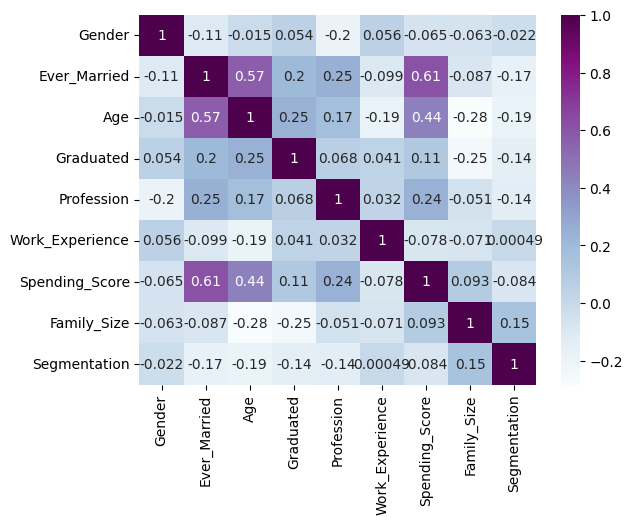

In [21]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="BuPu",
            annot= True)



<ipython-input-20-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

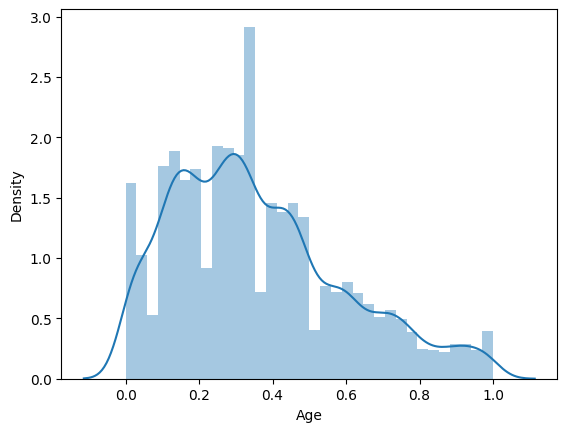

In [20]:
sns.distplot(df1['Age'])

<Axes: xlabel='Family_Size', ylabel='Age'>

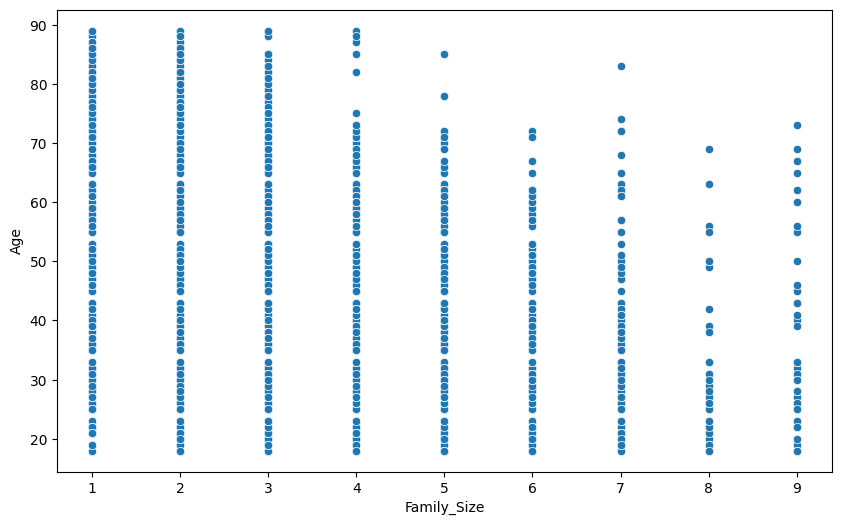

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=df1)


In [46]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]])
df1[["Age"]] = scale.transform(df1[["Age"]])






In [44]:
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,0.359171,0.633543,3.284735,2.612747,0.545414,2.841165
std,0.497497,0.491605,0.233407,0.481863,2.346963,3.391636,0.738536,1.533532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.183099,0.000000,2.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,0.323944,1.000000,3.000000,1.000000,0.000000,2.000000
75%,1.000000,1.000000,0.492958,1.000000,5.000000,4.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,2.000000,9.000000


In [45]:
df1['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [11]:
x = df1[['Gender','Ever_Married','Age','Graduated',
		 'Profession','Work_Experience','Spending_Score',
         'Family_Size']].values

y1 = df1[['Segmentation']].values




In [48]:
ohe = OneHotEncoder()
ohe.fit(y1)



OneHotEncoder()

In [49]:
y = ohe.transform(y1).toarray()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)
ai = Sequential([Dense(50,input_shape = [8]),
                 Dense(40,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(20,activation="relu"),
                 Dense(4,activation="softmax")])

ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])



In [17]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max',
    verbose=1,
    patience=20)

ai.fit( x = x_train, y = y_train,
        epochs=500, batch_size=256,
        validation_data=(x_test,y_test),
        callbacks = [early_stop]
        )

metrics = pd.DataFrame(ai.history.history)
metrics.head()

Epoch 1/500
24/24 [==============================] - 3s 27ms/step - loss: 1.3734 - accuracy: 0.3233 - val_loss: 1.3319 - val_accuracy: 0.3820
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 1.3200 - accuracy: 0.3782 - val_loss: 1.2915 - val_accuracy: 0.3911
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 1.2827 - accuracy: 0.4047 - val_loss: 1.2584 - val_accuracy: 0.4332
Epoch 4/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2635 - accuracy: 0.4234 - val_loss: 1.2460 - val_accuracy: 0.4370
Epoch 5/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2505 - accuracy: 0.4325 - val_loss: 1.2407 - val_accuracy: 0.4329
Epoch 6/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2434 - accuracy: 0.4386 - val_loss: 1.2312 - val_accuracy: 0.4464
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2387 - accuracy: 0.4374 - val_loss: 1.2261 - val_accuracy: 0.4467
Epoch 8/500

,loss,accuracy,val_loss,val_accuracy
0,1.373379,0.323272,1.331943,0.381996
1,1.320014,0.378246,1.291465,0.391099
2,1.282728,0.404722,1.258397,0.433243
3,1.263461,0.423440,1.245997,0.436952
4,1.250537,0.432546,1.240741,0.432906


<Axes: >

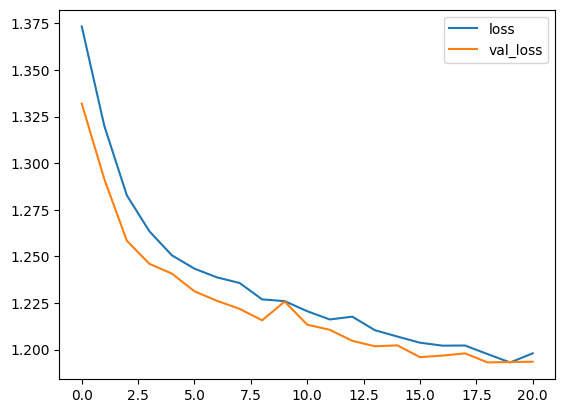

In [18]:
metrics[['loss','val_loss']].plot()

<Axes: >

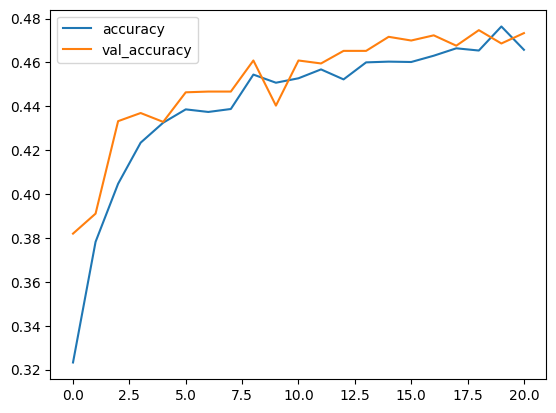

In [19]:
metrics[['accuracy','val_accuracy']].plot()

In [22]:
x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape



93/93 [==============================] - 0s 1ms/step


(2966,)

In [25]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [24]:
print(conf(y_truevalue,x_pred))

[[340 103 136 200]
 [225 118 233  93]
 [127  84 426  94]
 [170  34  63 520]]


In [26]:
print(report(y_truevalue,x_pred))


              precision    recall  f1-score   support

           0       0.39      0.44      0.41       779
           1       0.35      0.18      0.23       669
           2       0.50      0.58      0.54       731
           3       0.57      0.66      0.61       787

    accuracy                           0.47      2966
   macro avg       0.45      0.46      0.45      2966
weighted avg       0.46      0.47      0.46      2966



In [27]:
import pickle

# Saving the Model
ai.save('customer_classification_model.h5')

# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le], fh)

# Loading the Model
ai_brain = load_model('customer_classification_model.h5')


In [51]:
with open('customer_data.pickle', 'rb') as fh:
   [x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le]=pickle.load(fh)

x_prediction = np.argmax(ai_brain.predict(x_test[1:2,:]), axis=1)

print(x_prediction)
print(le.inverse_transform(x_prediction))

1/1 [==============================] - 0s 23ms/step
[0]
['A']
